In [1]:
"""Importación de librerías y funciones necesarias"""
import os
import numpy                as np
import matplotlib.pyplot    as plt
from   scipy import fftpack as fft
from   numpy.linalg         import inv
from   scipy.signal         import hann, flattop, blackman, freqz, butter, filtfilt, cheby1

In [2]:
"""Configuración del path de datos"""
directorio = os.path.abspath('..\..\data')
print(directorio)

C:\Users\Alex XD\Desktop\UamI\11vo_Tri\Metodos Computacionales\MCIB-19-P\data


In [3]:
"""Apertura de archivos adquiridos en Práctica 0"""
#Lista con nombre de los archivos a cargar
archivos = ['A2_f','A2_1_f','A2_2_f','A2_3_f','A2_4_f','A2_5_f','A2_6_f']

#Ciclo que permite abrir los archivos y almacenarlos en una variable cuyo nombre sea el mismo que el archivo
for i in archivos:
    temp = np.load(directorio+'\\'+i+'.npz')      #Se carga el archivo
    exec('%s = temp'%i)                           #Recorta para eliminar los encabezados y las columnas innecesarias
    
sr = A2_f['sr']


In [4]:
for i in A2_f.keys():
    print(i)

PO2
EMG
EKG
RSP
PUL
sr


In [5]:
"""Filtrando la señal respiratoria"""
fc = np.array([3])/sr
N  = 2
b,a = butter(N,fc,btype='low')
filtrada = filtfilt(b,a,A2_6_f['RSP'])



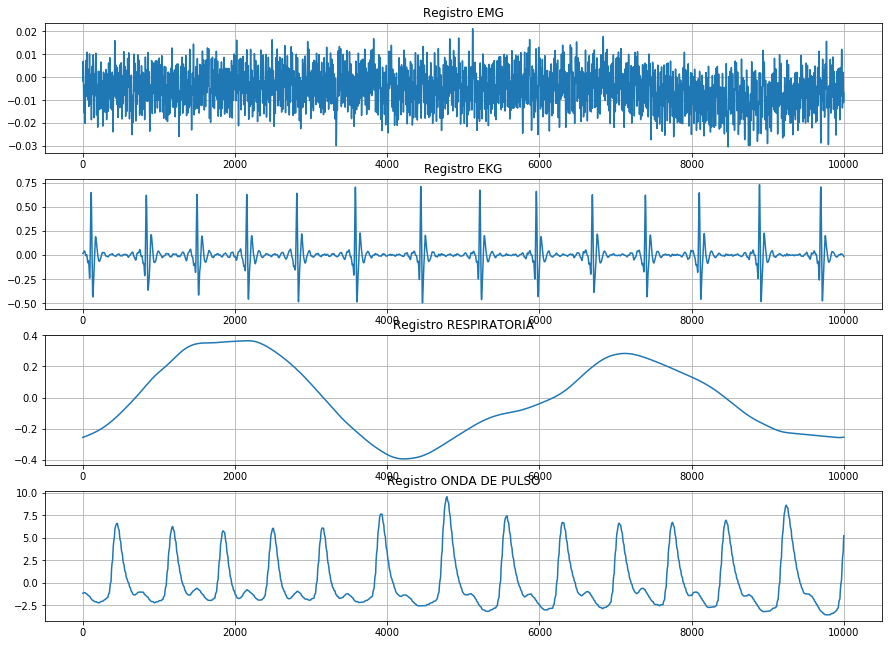

In [6]:
name = A2_6_f
# Asignando valores
EMG = A2_6_f['EMG'][3000:].copy()
EKG = A2_6_f['EKG'][3000:].copy()
RSP = A2_6_f['RSP'][3000:].copy()
PUL = A2_6_f['PUL'][3000:].copy()

# Generando ejes para la segmentación
b_EMG  = EMG[11000:21000]
r1_EMG = EMG[35000:45000]
a_EMG  = EMG[59000:69000]
r2_EMG = EMG[84000:94000]

b_EKG  = EKG[11000:21000]
r1_EKG = EKG[35000:45000]
a_EKG  = EKG[59000:69000]
r2_EKG = EKG[84000:94000]

b_RSP  = RSP[11000:21000]
r1_RSP = RSP[35000:45000]
a_RSP  = RSP[59000:69000]
r2_RSP = RSP[84000:94000]

b_PUL  = PUL[11000:21000]
r1_PUL = PUL[35000:45000]
a_PUL  = PUL[59000:69000]
r2_PUL = PUL[84000:94000]

#Eje de tiempo para los registros
time = np.linspace(0,A2_1_f['EMG'].shape[0]/sr,A2_1_f['EMG'].shape[0])

plt.figure(figsize = (15,11))
plt.subplot(4,1,1)
plt.plot(name['EMG'][84000:94000])
plt.title('Registro EMG')
plt.grid(True)

plt.subplot(4,1,2)
plt.plot(name['EKG'][84000:94000])
plt.title('Registro EKG')
plt.grid(True)

plt.subplot(4,1,3)
#plt.plot(name['RSP'][47000:79000])
plt.plot(filtrada[84000:94000])
plt.title('Registro RESPIRATORIA')
plt.grid(True)

plt.subplot(4,1,4)
plt.plot(name['PUL'][84000:94000])
plt.title('Registro ONDA DE PULSO')
plt.grid(True)

plt.show()



In [7]:
def z_score (param):
        prom = param.mean()
        st   = param.std()
        scor = (param- prom)/st
        return scor

C:\Users\Alex XD\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


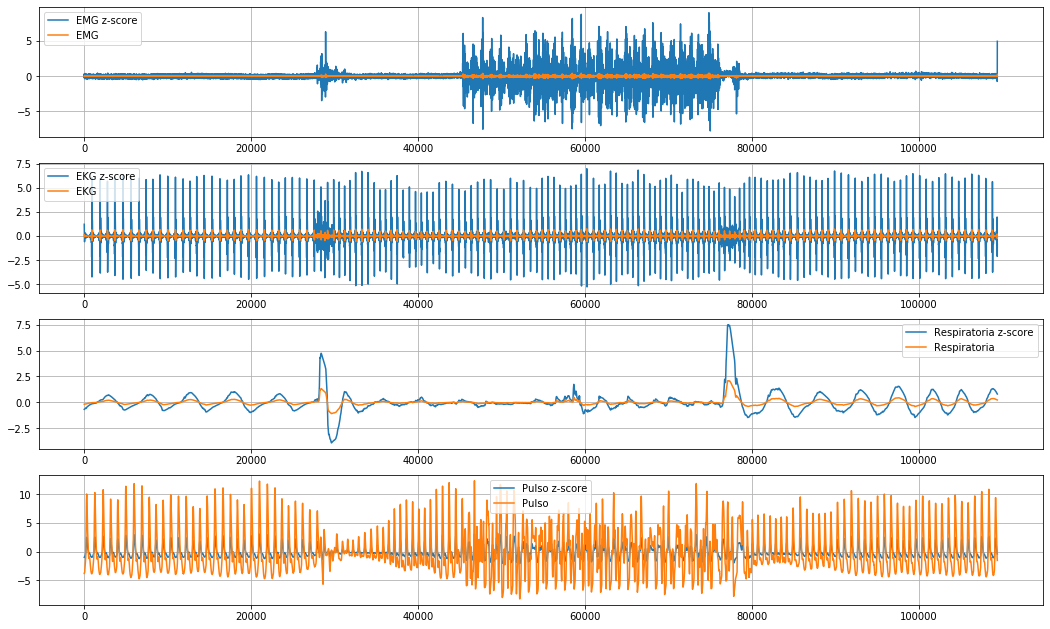

In [8]:
"""Rescalando la señal Z score"""

scor1 = z_score(EMG)
scor2 = z_score(EKG)
scor3 = z_score(RSP)
scor4 = z_score(PUL)

plt.figure(figsize = (18,11))
plt.subplot(4,1,1)
plt.plot (scor1, label = "EMG z-score")
plt.plot(EMG, label = "EMG")
plt.legend()
plt.grid(True)
plt.subplot(4,1,2)
plt.plot (scor2, label = "EKG z-score")
plt.plot(EKG, label = "EKG")
plt.legend()
plt.grid(True)
plt.subplot(4,1,3)
plt.plot (scor3,label = "Respiratoria z-score")
plt.plot(RSP,label = "Respiratoria")
plt.legend()
plt.grid(True)
plt.subplot(4,1,4)
plt.plot (scor4, label = "Pulso z-score")
plt.plot(PUL,label = "Pulso")
plt.legend()
plt.grid(True)
plt.show()


In [9]:
def recta (param):
    y2 = 1
    y1 = -1
    x2 = max(param)
    x1 = min(param)
    m = (y2-y1)/(x2-x1)
    b = y2-(m*x2)
    rec = (m*param)+b
    return rec

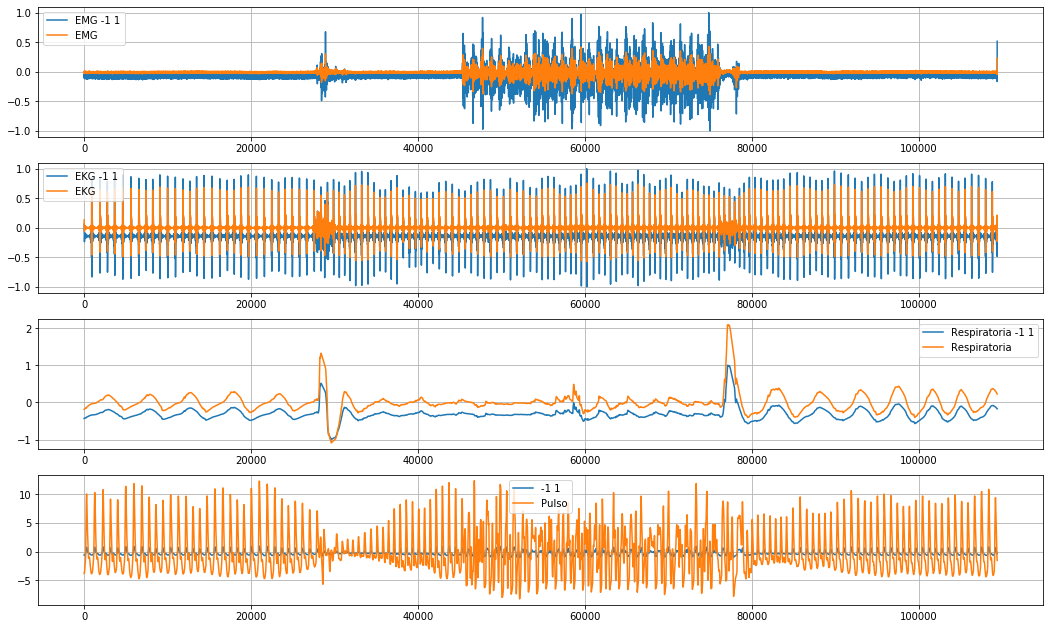

In [10]:
"""Rrescalando la señal en intervalo [-1 1]"""
rec1 = recta(EMG)
rec2 = recta(EKG)
rec3 = recta(RSP)
rec4 = recta(PUL)


plt.figure(figsize = (18,11))
plt.subplot(4,1,1)
plt.plot (rec1, label = "EMG -1 1")
plt.plot(EMG, label = "EMG")
plt.legend()
plt.grid(True)
plt.subplot(4,1,2)
plt.plot (rec2, label = "EKG -1 1")
plt.plot(EKG, label = "EKG")
plt.legend()
plt.grid(True)
plt.subplot(4,1,3)
plt.plot (rec3,label = "Respiratoria -1 1")
plt.plot(RSP,label = "Respiratoria")
plt.legend()
plt.grid(True)
plt.subplot(4,1,4)
plt.plot (rec4, label = "-1 1")
plt.plot(PUL,label = "Pulso")
plt.legend()
plt.grid(True)
plt.show()


In [11]:
""""Función de densidad"""
def histogram(s,nbins=10,width=0.5):
    intervals = np.linspace( s.min(),s.max(),nbins+1)
    
    left = s[:,np.newaxis] > intervals[:-1][np.newaxis]
    right= s[:,np.newaxis] < intervals[1:] [np.newaxis]
    hist = (left*right).sum(axis=0)
    return(intervals[:-1],hist)

In [12]:
n_bins = np.sqrt(EMG.shape[0])

I_EMG,hist_EMG     = histogram(EMG,n_bins)
I_EMG_Z,hist_EMG_Z = histogram(scor1,n_bins)
I_EMG_1,hist_EMG_1 = histogram(rec1,n_bins)

I_EKG,hist_EKG     = histogram(EKG,n_bins)
I_EKG_Z,hist_EKG_Z = histogram(scor2,n_bins)
I_EKG_1,hist_EKG_1 = histogram(rec2,n_bins)


I_RSP,hist_RSP     = histogram(RSP,n_bins)
I_RSP_Z,hist_RSP_Z = histogram(scor3,n_bins)
I_RSP_1,hist_RSP_1 = histogram(rec3,n_bins)

I_PUL,hist_PUL     = histogram(PUL,n_bins)
I_PUL_Z,hist_PUL_Z = histogram(scor4,n_bins)
I_PUL_1,hist_PUL_1 = histogram(rec4,n_bins)

C:\Users\Alex XD\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  This is separate from the ipykernel package so we can avoid doing imports until


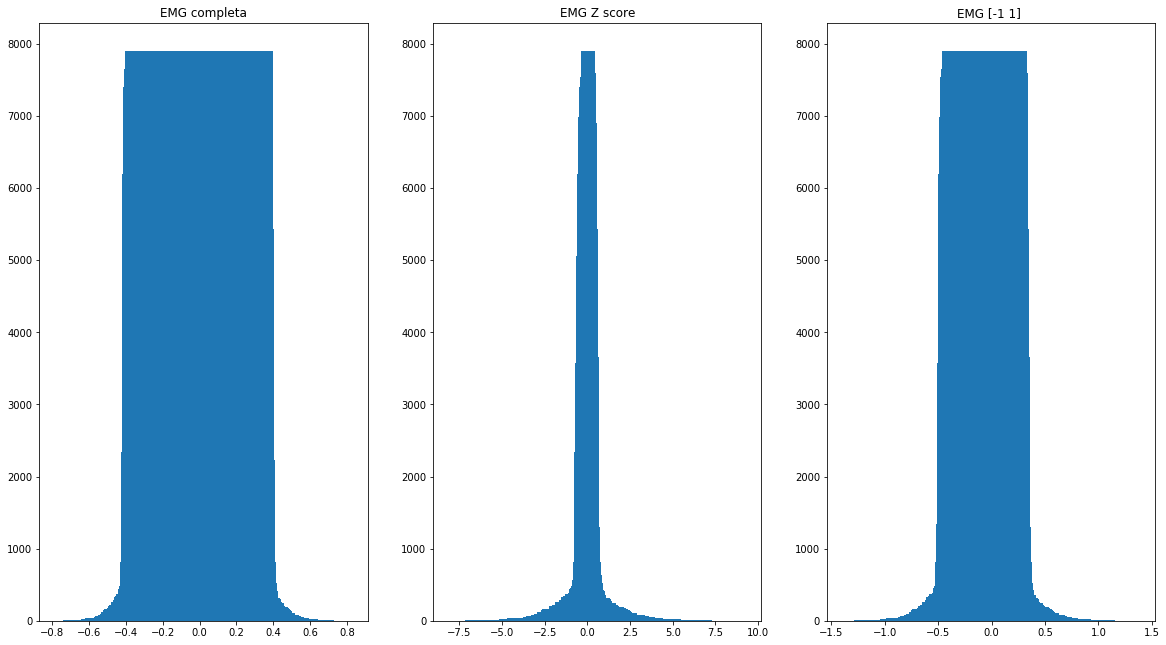

In [13]:
# Graficando
plt.figure(figsize = (20,11))
plt.subplot(1,3,1)
plt.bar(I_EMG,hist_EMG)
plt.title('EMG completa')
plt.subplot(1,3,2)
plt.bar(I_EMG_Z,hist_EMG_Z)
plt.title('EMG Z score')
plt.subplot(1,3,3)
plt.bar(I_EMG_1,hist_EMG_1)
plt.title('EMG [-1 1] ')
plt.show()

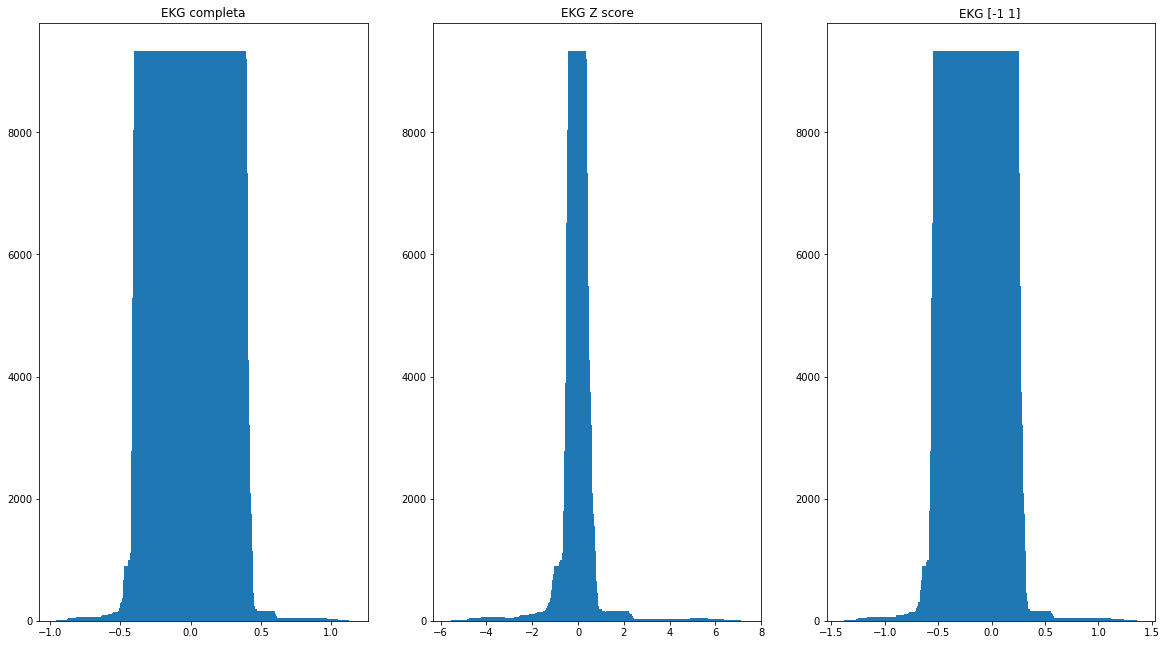

In [14]:
plt.figure(figsize = (20,11))
plt.subplot(1,3,1)
plt.bar(I_EKG,hist_EKG)
plt.title('EKG completa')
plt.subplot(1,3,2)
plt.bar(I_EKG_Z,hist_EKG_Z)
plt.title('EKG Z score')
plt.subplot(1,3,3)
plt.bar(I_EKG_1,hist_EKG_1)
plt.title('EKG [-1 1] ')
plt.show()

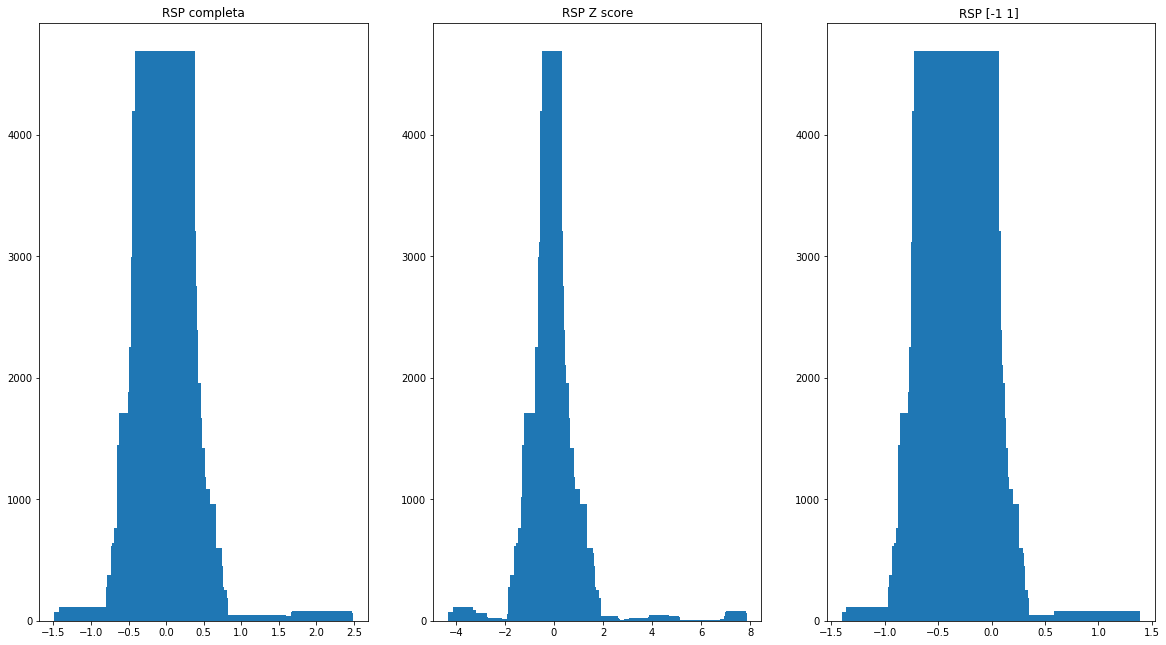

In [15]:
plt.figure(figsize = (20,11))
plt.subplot(1,3,1)
plt.bar(I_RSP,hist_RSP)
plt.title('RSP completa')
plt.subplot(1,3,2)
plt.bar(I_RSP_Z,hist_RSP_Z)
plt.title('RSP Z score')
plt.subplot(1,3,3)
plt.bar(I_RSP_1,hist_RSP_1)
plt.title('RSP [-1 1] ')
plt.show()

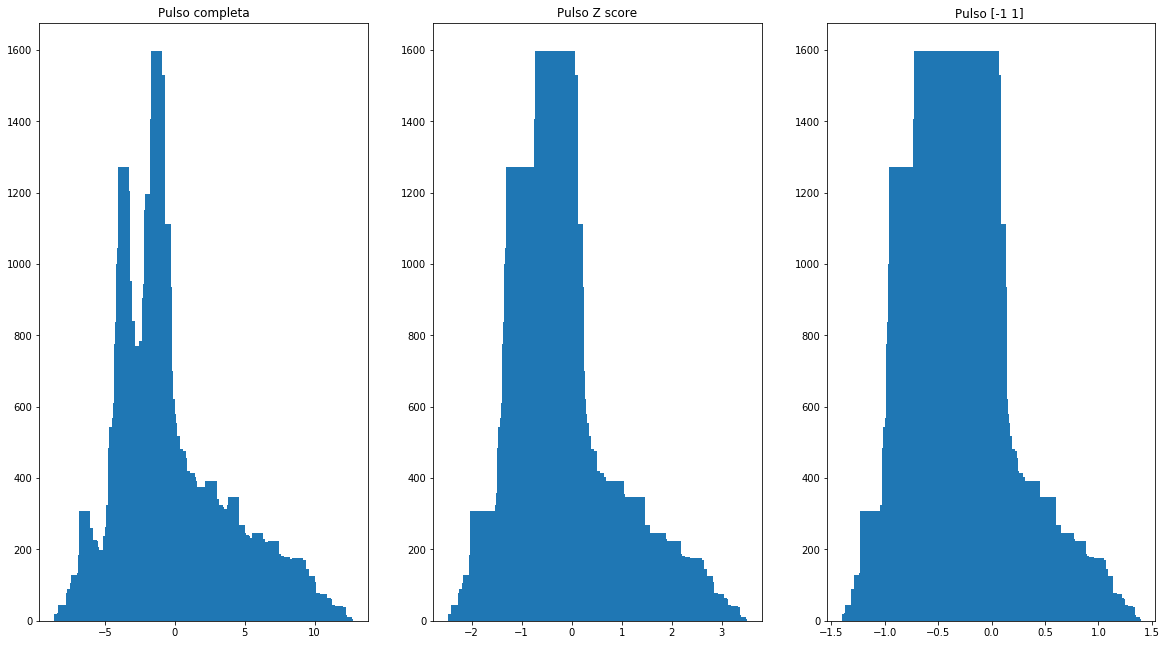

In [16]:
plt.figure(figsize = (20,11))
plt.subplot(1,3,1)
plt.bar(I_PUL,hist_PUL)
plt.title('Pulso completa')
plt.subplot(1,3,2)
plt.bar(I_PUL_Z,hist_PUL_Z)
plt.title('Pulso Z score')
plt.subplot(1,3,3)
plt.bar(I_PUL_1,hist_PUL_1)
plt.title('Pulso [-1 1] ')
plt.show()